In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import  PorterStemmer
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import re
import pickle

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mohda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

Bad key "text.kerning_factor" on line 4 in
C:\Users\mohda\anaconda3\envs\tensorflow_env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv('sentiment_tweets3.csv')

In [3]:
df.head()

,Unnamed: 0,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [4]:
df.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


**Cleaning Text**

In [6]:
corpus = []
ps = PorterStemmer()

for i in range(0,df.shape[0]):
    message = re.sub(pattern='[^a-zA-Z]',repl=' ',string = df.message[i])
    message = message.lower()
    words = message.split()
    words = [word for word in words if word not in set(stopwords.words('english'))]
    words = [ps.stem(word) for word in words]
    message = " ".join(words)
    corpus.append(message)

In [7]:
corpus

['real good moment missssssssss much',
 'read manga http plurk com p mzp e',
 'comeagainjen http twitpic com lx http www youtub com watch v zogfqvh',
 'lapcat need send em account tomorrow oddli even refer tax support evid though',
 'add myspac myspac com lookthund',
 'sleepi good time tonight though',
 'silkcharm nbn someon alreadi said fiber home mean least regular',
 'c possibl today nice',
 'nite twittervil workout ciao',
 'danann night darlin sweet dream',
 'good morn everybodi',
 'final creat wordpress blog alreadi blog seattl coffe commun http tinyurl com c uufd',
 'kisha cnt get u til get frm u rememb ur top',
 'nicolerichi ye rememb band awesom pleas repli',
 'realli love reflect shadow',
 'blueaero ooo fantasi like fantasi novel check',
 'rokchic prob sell noth blog http snedwan com get listen band itun',
 'shipovalov quot nokla connect peopl quot',
 'stay late start earli good thing like job',
 'kal penn read new job congratul fantast',
 'abl sleep think watch ugli betti onl

In [71]:
import preprocessor as p

In [72]:
corpus = []
ps = PorterStemmer()
spell = SpellChecker()
p.set_options(p.OPT.URL,p.OPT.MENTION,p.OPT.HASHTAG,p.OPT.EMOJI,p.OPT.SMILEY,p.OPT.NUMBER)
for i in range(0,df.shape[0]):

#     message = re.sub('\[.*?\]', '',df.message[i])
#     message = re.sub('https?://\S+|www\.\S+', '',message)
#     message = re.sub('<.*?>+', '',message)
#     message = re.sub('\n', '',message)
#     message = re.sub('\w*\d\w*', '',message)
#     message = re.sub("@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+", " ",message)
    message = p.clean(df.message[i])
    message = message.lower()
    words = message.split()
    words = [word for word in words if word not in set(stopwords.words('english'))]
    words = [ps.stem(word) for word in words]
    message = " ".join(words)
    corpus.append(message)

In [73]:
corpus

['real good moment. missssssssss much,',
 'read manga',
 '-',
 "need send 'em account tomorrow. oddly, even refer taxes. support evidence, though.",
 'add myspace!!!',
 'sleepy. good time tonight though',
 're: someon alreadi said, fiber home mean least regular',
 'c possibl today. nice',
 'nite twittervil workout -ciao',
 "night, darlin'! sweet dream",
 'good morn everybody!',
 "finally! creat wordpress blog. there' alreadi blog seattl coffe commun ...",
 'kisha cnt get u til get frm u rememb ur top',
 'ye rememb band, awesome, pleas repli',
 'realli love reflect shadow',
 'ooo fantasy? like fantasi novel check',
 "probs, sell noth blog i'll get listen band, itunes?",
 '&quot;nokla connect people&quot; ?? ??????? ???????',
 'stay late start earli good thing like job',
 "read new job, congratulations! that' fantastic.",
 "abl sleep all. think i'll watch ugli betti online.",
 'woo thank ron steev follow yeow folowerssss haha p. wanna got ellen show',
 "yeah sure sister' take extra gd ca

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
X = cv.fit_transform(corpus).toarray()

In [75]:
Y = df.label.values

In [76]:
pickle.dump(cv,open('cv.pkl','wb'))

In [77]:
from sklearn.model_selection import  train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [78]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, Y_train)

MultinomialNB()

In [79]:
pickle.dump(classifier,open('model.pkl','wb'))

In [80]:
from sklearn.metrics import confusion_matrix,accuracy_score
pred = classifier.predict(X_test)
cm =confusion_matrix(Y_test,pred)
ac = accuracy_score(Y_test,pred)

In [81]:
cm

array([[1561,   53],
       [  14,  435]], dtype=int64)

In [82]:
ac

0.9675230247212797

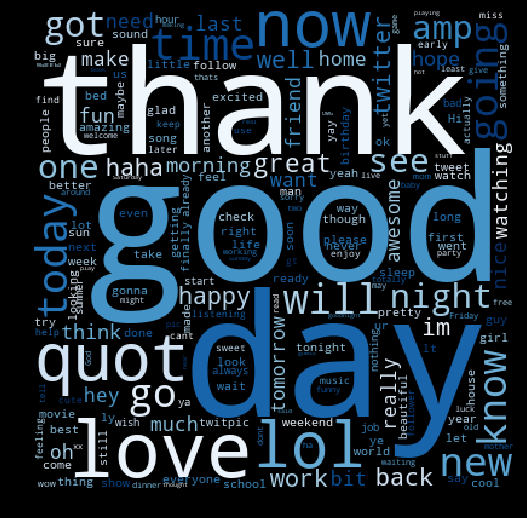

In [83]:
positive_words = ' '.join(list(df[df['label'] == 0]['message']))
positive_wc = WordCloud(width = 400,height = 400, collocations=False, colormap="Blues").generate(positive_words)
plt.figure(figsize = (10, 7), facecolor = 'k')
plt.imshow(positive_wc)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

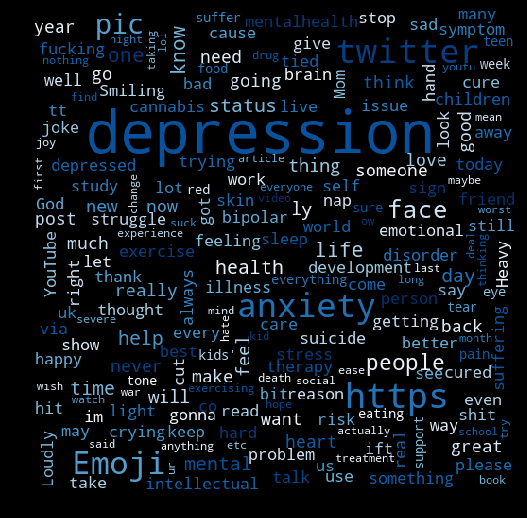

In [84]:
depressive_words = ' '.join(list(df[df['label'] == 1]['message']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)
plt.figure(figsize = (10, 7), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [85]:
text = ['dont mistake a bad day with depression']
vect = cv.transform(text).toarray()
mypredict = classifier.predict(vect)
mypredict

array([1], dtype=int64)

In [86]:
text = ['Loving how me and my lovely partner is talking about what we want.']
vect = cv.transform(text).toarray()
mypredict = classifier.predict(vect)
mypredict

array([1], dtype=int64)

In [87]:
text = ['always spread love']
vect = cv.transform(text).toarray()
mypredict = classifier.predict(vect)
mypredict

array([0], dtype=int64)

In [88]:
text = ['I just might kill myself']
vect = cv.transform(text).toarray()
mypredict = classifier.predict(vect)
mypredict

array([0], dtype=int64)

In [89]:
text = ['There are wounds that never show on the body that are deeper and more hurtful than anything that bleeds']
vect = cv.transform(text).toarray()
mypredict = classifier.predict(vect)
mypredict

array([1], dtype=int64)

In [90]:
text = ['I love the way you talk']
vect = cv.transform(text).toarray()
mypredict = classifier.predict(vect)
mypredict

array([0], dtype=int64)

In [91]:
text = ['Do you not see how necessary a world of pains and troubles is to school an intelligence and make it a soul']
vect = cv.transform(text).toarray()
mypredict = classifier.predict(vect)
mypredict

array([0], dtype=int64)

In [92]:
text = ['start each day with a greatful heart']
vect = cv.transform(text).toarray()
mypredict = classifier.predict(vect)
mypredict

array([0], dtype=int64)

In [93]:
text = ['Do you not see how necessary a world of pains and troubles is to school an intelligence and make it a soul']
vect = cv.transform(text).toarray()
mypredict = classifier.predict(vect)
mypredict

array([0], dtype=int64)

In [94]:
text = ['dont cry because its over,smile because it happened']
vect = cv.transform(text).toarray()
mypredict = classifier.predict(vect)
mypredict

array([1], dtype=int64)

In [95]:
text = ['it is ok to be glowstick sometimes we need to break before we shine']
vect = cv.transform(text).toarray()
mypredict = classifier.predict(vect)
mypredict

array([0], dtype=int64)

In [96]:
text = ['dont cry because its over,smile because it happened']
vect = cv.transform(text).toarray()
mypredict = classifier.predict(vect)
mypredict

array([1], dtype=int64)

In [97]:
text = ['There are wounds that never show on the body that are deeper and more hurtful than anything that bleeds']
vect = cv.transform(text).toarray()
mypredict = classifier.predict(vect)
mypredict

array([1], dtype=int64)

In [98]:
text = ['Getting better from depression demands a lifelong commitment. I’ve made that commitment for my life’s sake and for the sake of those who love me']
vect = cv.transform(text).toarray()
mypredict = classifier.predict(vect)
mypredict

array([1], dtype=int64)

In [99]:
text = ['A man sees in the world what he carries in his heart']
vect = cv.transform(text).toarray()
mypredict = classifier.predict(vect)
mypredict

array([0], dtype=int64)

In [101]:
text = ['Things turn out best for the people who make the best of the way things turn out']
vect = cv.transform(text).toarray()
mypredict = classifier.predict(vect)
mypredict

array([0], dtype=int64)

In [102]:
text = ['I was so scared to give up depression, fearing that somehow the worst part of me was actually all of me']
vect = cv.transform(text).toarray()
mypredict = classifier.predict(vect)
mypredict

array([1], dtype=int64)